<a href="https://colab.research.google.com/github/komorimasashi/kakuritsu_toukei_1/blob/main/4th_lec_histgram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 度数分布表とヒストグラム

##概要

**目的**

度数分布表とヒストグラムを作成する


**今回使うライブラリ**
*   Pandas： データの集計や可視化を統合的に行うライブラリ





**Pandas**

Pandasライブラリを使うと，さまざまなデータの操作をスムーズに柔軟に実施することができます．

Pandasでは，データの塊を「シリーズ(Series)オブジェクト」や「データフレーム (DataFrame) オブジェクト」といった型で扱います．また，このようなオブジェクト効率的に高速に扱うための機能が用意されています．

*   Seriesオブジェクトは時系列データのよう1次元のデータを主に扱います
*   Dataframeオブジェクトは表のように2次元になっているデータを収納するものです

公式ドキュメント：http://pandas.pydata.org/pandas-docs/stable/

##ライブラリの読み込み

Pythonは標準の状態ではあまりいろいろな事はできませんが，さまざまなライブラリをインポート（導入）することで，いろいろな関数が使えるようになったり，データ処理に適した変数の型を使えるようになったりして，超パワーアップします．ここでは，データ分析でよく使われるPythonのライブラリであるNumpy，Matplotlib，Pandasを使ってみましょう．

**基本的なライブラリの読み込みパターン**

**import xxx**

xxx library をすべて読み込み，xxx.関数名 といった形で利用する．

**import xxx.a_func as b_func**

xxx library の a_func だけを b_func という別名をつけて読み込む．名前の衝突の防止や短縮型として利用する．

**from xxx import a_func**

xxx library の a_func だけ読み込み，a_func で利用する．from をつけると xxx は指定せず利用できる．

In [ ]:
#pandasライブラリを pd という略称をつけて読み込む
import pandas as pd

##通学時間の度数分布

In [ ]:
#データ読込（仮想データ）
commuting_time = pd.Series([60,110,90,90,105,120,75,70,130,45,20,120,80,90,90,5,50,
                            100,80,10,10,15,60,90,70,60,40,70,30,150,90,80,7,90,36,80,
                            110,50,30,60,70,90,150,90,120,90,100,60,100,45,90,70,90,
                            30,90,90,130,140,90,70,70,120,90,30,120,40,90,60,40,4,10,
                            90,90,70,20,30,60,30,120,50,110,60,90,10,90,50,120,30,100,
                            120,90,60,90,15,110,100,80,10,120,90,80,70,60,20,120,120,
                            80,20,5,90,60,60,100,75,90,15,10,90,100,70,80,120,90,90,
                            100,80,60,95,90,20,50,100,70,70,120,120,60,80,30,20,100,
                            30,60,25,120,75,50,120,30,90,180,150
        ])

In [ ]:
#基本統計量の確認
commuting_time.describe()

count    152.000000
mean      74.092105
std       36.490107
min        4.000000
25%       50.000000
50%       80.000000
75%       96.250000
max      180.000000
dtype: float64

In [ ]:
#一部の要素だけ表示したい場合（maxを例に）
commuting_time.describe().loc['max']

180.0

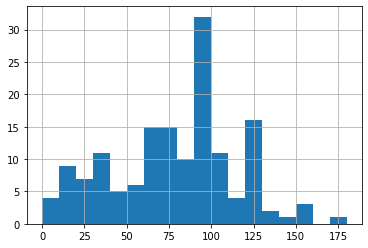

In [ ]:
#間隔を１０にする
interval = 10
# 分割の粒度（range関数でrange（開始，終了，間隔）と指定すると，等差数列ができる）
bins = range(0,max(commuting_time)+interval , interval ) 

#定められた区間数(bins)でヒストグラムを描画する
commuting_time.hist(bins=bins)

In [ ]:
#pd.cutは区間に振り分ける処理を行う
commuting_time_cut = pd.cut(commuting_time, bins =bins)

#集計する．
#0から10までは0人であることがわかる．”（”は開区間，”]”は閉区間を意味する
pd.value_counts(commuting_time_cut, sort=False)

(0, 10]       10
(10, 20]       9
(20, 30]      11
(30, 40]       4
(40, 50]       8
(50, 60]      15
(60, 70]      12
(70, 80]      13
(80, 90]      31
(90, 100]     11
(100, 110]     5
(110, 120]    16
(120, 130]     2
(130, 140]     1
(140, 150]     3
(150, 160]     0
(160, 170]     0
(170, 180]     1
dtype: int64

In [ ]:
#サンプルサイズ
print(len(commuting_time))
#最大値
print(max(commuting_time))
#最小値
print(min(commuting_time))

152
180
4


*   サンプルサイズ，最大値と最小値を求める。
*   区間の個数 𝑘 (グラフの棒の本数）を決める。
    *        簡単に、𝑘=10 や 20 などきりの良い数にする
    *       $k=\sqrt{n}$　　ただし𝑛はサンプルサイズ（データの個数）
    *       $k=1+\log_2 (𝑛)$ [スタージェスの式]
          

13 区間


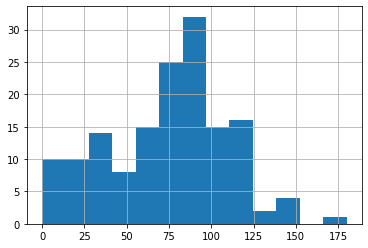

In [ ]:
#平方根で区間数を求める
from math import sqrt
k=sqrt(len(commuting_time))

from math import ceil
#階級数は整数である必要があるので切り上げ関数ceilを用いる
edges = ceil(k)
print(edges, '区間')

#(0,最大値]の区間をk分割した区間でヒストグラムを書く
commuting_time.hist(bins=edges,range=(0,max(commuting_time)))

9 区間


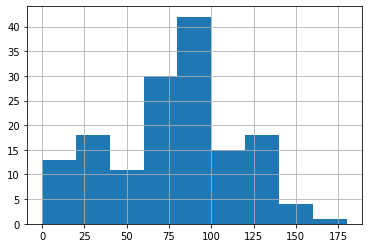

In [ ]:
#スタージェスの式で求めると
from math import log
k = 1+ log(len(commuting_time), 2)

from math import ceil
#階級数は整数である必要があるので切り上げ関数ceilを用いる
edges = ceil(k)
print(edges, '区間')

#(0,最大値]の区間をk分割した区間でヒストグラムを書く
commuting_time.hist(bins=edges,range=(0,max(commuting_time)))

50 区間


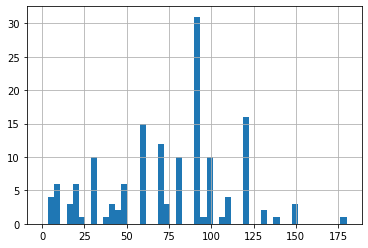

In [ ]:
#区間が多すぎると見にくいヒストグラムができる(50区間の例)
edges = 50
print(edges, '区間')

#(0,最大値]の区間をk分割した区間でヒストグラムを書く
commuting_time.hist(bins=edges,range=(0,max(commuting_time)))